# United Kingdom Tourism - An Analysis on Spend by Overseas Residents

I have acquired the UK Tourism data from the Office for National Statistics website. The key questions I want to answer are:
- Using linear regression, can the spend for 2018 Q3 be predicted ?
- Using multiple linear regression, what combination of the profile of the traveller, the visits they make and nights they stay determine the most accurate spend in the UK?
- Using Logistic Regression, can the age of the traveller and the duration they're visiting for determine the sex of the traveller?
- Using multiple linear regression on year and spend from travel, can the retail revenue be predicted?
- How does the currency exchange rate of each quarter in selected countries determine the spend by visitors from that country?

In this notebook, I have demonstrated the various steps taken to wrangle the data, perform exploratory analysis to decide the approach and models used to achieve this.

# Table of Contents

### 1. [Data Wrangling](#datawrang)
### 2. [Exploratory Data Analysis](#eda)
### 3. [Feature Derivation](#fder)
### 4. [Modelling Process](#model)
   ###   4.1. [Linear Regression Analysis](#lra)
   ###   4.2. [Multiple Linear Regression Analysis](#mlra)
   ###   4.3. [Logistic Regression](#logreg)
### 5. [Testing for Correlation with Retail Data](#retail)
### 6. [Testing for Correlation with Currency Exchange Rate Data](#currency)

## Section 1: Data Wrangling
<a id="datawrang"></a>

This dataset contained several blank/null fields which needed to be amended to ensure the data is suitable for analysis.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Load the data
Travel_2016 = pd.read_excel('Master_Travel_FINAL.xlsx', sheet_name=0)
Travel_2017 = pd.read_excel('Master_Travel_FINAL.xlsx', sheet_name=1)
Travel_2018 = pd.read_excel('Master_Travel_FINAL.xlsx', sheet_name=2)

In [3]:
#concatenate the sheets
Travel = pd.concat([Travel_2016, Travel_2017, Travel_2018])

In [4]:
#check the DataFrame
Travel.head()

,SlNo.,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
0,0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Male,8.5,1350.873,8942.392,672087.645
1,1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Female,2,466.148,1398.444,68989.904
2,2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,2,466.148,466.148,193451.420
3,3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,8.5,1615.669,7924.564,531566.723
4,4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Female,2,931.866,2795.598,303788.316


In [5]:
#setting SlNo. as the index to avoid duplicated indices from eliminating data
Travel = Travel.set_index('SlNo.')

In [6]:
#investigate the DataFrame
Travel.shape

(43040, 13)

The cells with the value #NULL! have been replaced with zero.

In [7]:
#replace #NULL! with NaN
Travel.replace('#NULL!', np.NaN)

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Male,8.5,1350.873,8942.392,6.720876e+05
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Female,2,466.148,1398.444,6.898990e+04
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,2,466.148,466.148,1.934514e+05
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,8.5,1615.669,7924.564,5.315667e+05
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Female,2,931.866,2795.598,3.037883e+05
5,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Female,8.5,1924.279,7697.116,3.290732e+05
6,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Male,2,1770.808,3832.812,3.499447e+05
7,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Male,8.5,971.138,5826.828,5.428661e+05
8,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Female,2,892.322,2676.966,2.908970e+05


In [8]:
#Replace NaN with zeros
Travel = Travel.fillna(0)
Travel.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Male,8.5,1350.873,8942.392,672087.645
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Female,2,466.148,1398.444,68989.904
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,2,466.148,466.148,193451.420
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Male,8.5,1615.669,7924.564,531566.723
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20,Female,2,931.866,2795.598,303788.316


Age and duration are features that can also potentially impact the spend. These columns however included string values. These have been replaced by zero.

In [9]:
#replace #D/K, Nil Stay and Stay not known
Travel['Age']=Travel['Age'].replace('D/K', 0)
Travel['duration'] = Travel['duration'].replace('Nil Stay', 0)
Travel['duration'] = Travel['duration'].replace('Stay not known', 0)
Travel['duration'] = Travel['duration'].replace('Stay Not Known', 0)

In [10]:
#check the dataframe for above replacements
Travel

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Male,8.5,1350.873,8942.392,6.720876e+05
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,Female,2.0,466.148,1398.444,6.898990e+04
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,Male,2.0,466.148,466.148,1.934514e+05
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,Male,8.5,1615.669,7924.564,5.315667e+05
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,Female,2.0,931.866,2795.598,3.037883e+05
5,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,Female,8.5,1924.279,7697.116,3.290732e+05
6,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Male,2.0,1770.808,3832.812,3.499447e+05
7,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Male,8.5,971.138,5826.828,5.428661e+05
8,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,29.5,Female,2.0,892.322,2676.966,2.908970e+05


In [11]:
#check tail to ensure values are as expected
Travel.tail()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
43035,2018,Q2,Overseas residents,Tunnel,Australia,Holiday,Non-Independent,59.5,Female,8.5,1390.069,8340.414,347517.25
43036,2018,Q2,Overseas residents,Tunnel,Australia,Holiday,Non-Independent,67.5,Male,20.5,1390.069,19460.966,695034.50
43037,2018,Q2,Overseas residents,Tunnel,Australia,VFR,Independent,39.5,Male,8.5,2158.624,8634.496,647587.20
43038,2018,Q2,Overseas residents,Tunnel,New Zealand,Holiday,Independent,49.5,Female,8.5,2158.624,28062.112,2698280.00
43039,2018,Q2,Overseas residents,Tunnel,New Zealand,Holiday,Independent,67.5,Male,8.5,2158.624,10793.120,323793.60


Sex is another valuable feature in this dataset which can potentially impact several other features. The string values have hence been converted into categorical variables.

In [12]:
#replace sex with categorical variables
Travel['Sex'] = Travel['Sex'].replace('Male', 0)
Travel['Sex'] = Travel['Sex'].replace('Female', 1)

In [13]:
#check the dataframe
Travel.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,0,8.5,1350.873,8942.392,672087.645
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,1,2.0,466.148,1398.444,68989.904
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,2.0,466.148,466.148,193451.420
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,8.5,1615.669,7924.564,531566.723
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,1,2.0,931.866,2795.598,303788.316


Since the values of 'visits', 'nights' and 'spend' are of different ranges with large outliers, these columns have been normalised to the range of 0 to 1. They have been individually normalised as the measure of the values in each column vary. The MinMaxScaler normalisation method has been used due to the nature of the dataset with values ranging from zero to billions.

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


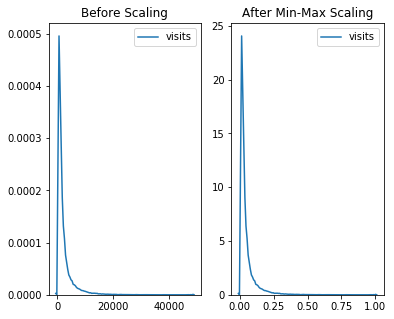

In [14]:
#normalise visits column using MinMaxScaler

df_1 = pd.DataFrame(Travel['visits'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range =(0,1))
scaled_df_1 = scaler.fit_transform(df_1.values.reshape(-1,1))
MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_df_1 = pd.DataFrame(scaled_df_1, columns=['visits'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sb.kdeplot(df_1['visits'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sb.kdeplot(scaled_df_1['visits'], ax=ax2)

plt.show()

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


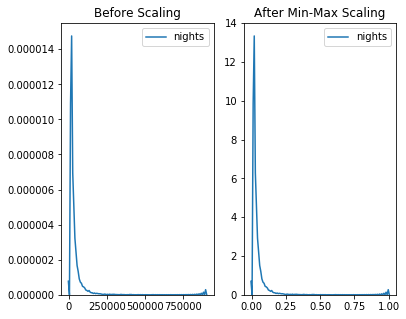

In [16]:
#normalise nights column using MinMaxScaler
df_2 = pd.DataFrame(Travel['nights'])

scaled_df_2 = scaler.fit_transform(df_2.values.reshape(-1,1))
scaled_df_2 = pd.DataFrame(scaled_df_2, columns=['nights'])

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize =(6,5))
ax3.set_title('Before Scaling')
sb.kdeplot(df_2['nights'], ax=ax3)
ax4.set_title('After Min-Max Scaling')
sb.kdeplot(scaled_df_2['nights'], ax=ax4)

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


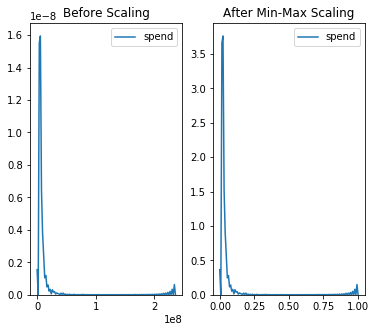

In [15]:
#normalise spend column using MinMaxScaler
df_3 = pd.DataFrame(Travel['spend'])


scaled_df_3 = scaler.fit_transform(df_3.values.reshape(-1,1))
scaled_df_3 = pd.DataFrame(scaled_df_3, columns=['spend'])



fig, (ax5, ax6) = plt.subplots(ncols=2, figsize =(6,5))
ax5.set_title('Before Scaling')
sb.kdeplot(df_3['spend'], ax=ax5)
ax6.set_title('After Min-Max Scaling')
sb.kdeplot(scaled_df_3['spend'], ax=ax6)

##### Note: The normalised values will be used only in the Modelling Process (Section 4). Most of the exploratory data analysis was performed using actual values as normalised values do not benefit the visualisations.

In [17]:
#concatenate the dataframes with scaled values into a single dataframe

scaled_df = pd.concat((scaled_df_1, scaled_df_2, scaled_df_3), axis = 'columns')
scaled_df.head()

,visits,nights,spend
0,0.027841,0.009893,0.002848
1,0.009607,0.001547,0.000292
2,0.009607,0.000516,0.000820
3,0.033298,0.008767,0.002253
4,0.019205,0.003093,0.001287


In [18]:
#check the number of rows and columns in scaled dataframe
scaled_df.shape

(43040, 3)

In [19]:
#drop the columns with exisitng values of visits, nights and spend and check the shape of Travel
Travel = Travel.drop(['visits','nights','spend'], axis = 'columns')
Travel.shape

(43040, 10)

Since the number of rows is the same between the two and since the rows have not been randomised, the scaled dataframe is concatenated with the travel dataframe.

In [20]:
#concatenate the dataframes
Travel = pd.concat([Travel, scaled_df], axis ='columns')
Travel.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend
SlNo.,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,0,8.5,0.027841,0.009893,0.002848
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,1,2.0,0.009607,0.001547,0.000292
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,2.0,0.009607,0.000516,0.000820
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,8.5,0.033298,0.008767,0.002253
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,1,2.0,0.019205,0.003093,0.001287


## Section 2: Exploratory Data Analysis
<a id="eda"></a>

A combination of Python and Tableau was used to perform exploratory analysis. The findings have been shared below.

In [21]:
#Describe the Dataframe
Travel.describe()

,Year,Age,Sex,duration,visits,nights,spend
count,43040.000000,43040.000000,43040.00000,43040.000000,43040.000000,43040.000000,43040.000000
mean,2016.754391,40.395586,0.45790,11.946387,0.044954,0.017293,0.005578
std,0.733068,16.552549,0.49823,23.722233,0.064387,0.034762,0.013865
min,2016.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,29.500000,0.00000,2.000000,0.012582,0.002373,0.000653
50%,2017.000000,39.500000,0.00000,8.500000,0.024769,0.007079,0.002137
75%,2017.000000,49.500000,1.00000,8.500000,0.049773,0.018395,0.005823
max,2018.000000,67.500000,1.00000,270.000000,1.000000,1.000000,1.000000


In [22]:
#check the number of rows for all features of the dataframe
Travel.count()

Year        43040
quarter     43040
ukos        43040
mode        43040
country     43040
purpose     43040
package     43040
Age         43040
Sex         43040
duration    43040
visits      43040
nights      43040
spend       43040
dtype: int64

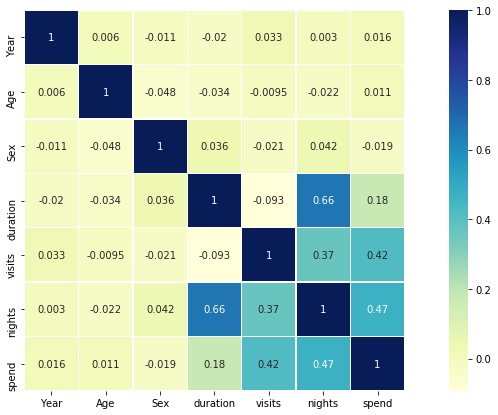

In [23]:
#plot the correlation matrix
plt.figure(figsize=(16,7))
sb.heatmap(Travel.corr(), cmap="YlGnBu", linewidths=0.5, square=True, annot=True)

The above heat map is a visual representation of the correlation matrix. It can be seen that 'visits' and 'nights' have higher impact on 'spend' in comparison to other variables. It can also be seen that 'Age' and 'duration' are independent of each other. 

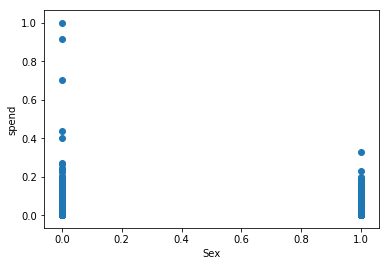

In [24]:
#Although the above heatmap doesn't show correlation between sex and spend, I went ahead to visualise this
plt.scatter(Travel.Sex, Travel.spend)
plt.xlabel('Sex')
plt.ylabel('spend')
plt.show()

The male travellers have quite a few outliers in comparison to the female travellers. It would be interesting to see in further exploratory analysis if there are particular countries where this pattern is evident.

The below choropleth visualises the spend across countries. It is evident that travellers from USA have spent the highest in the UK followed by Germany, France and Spain.


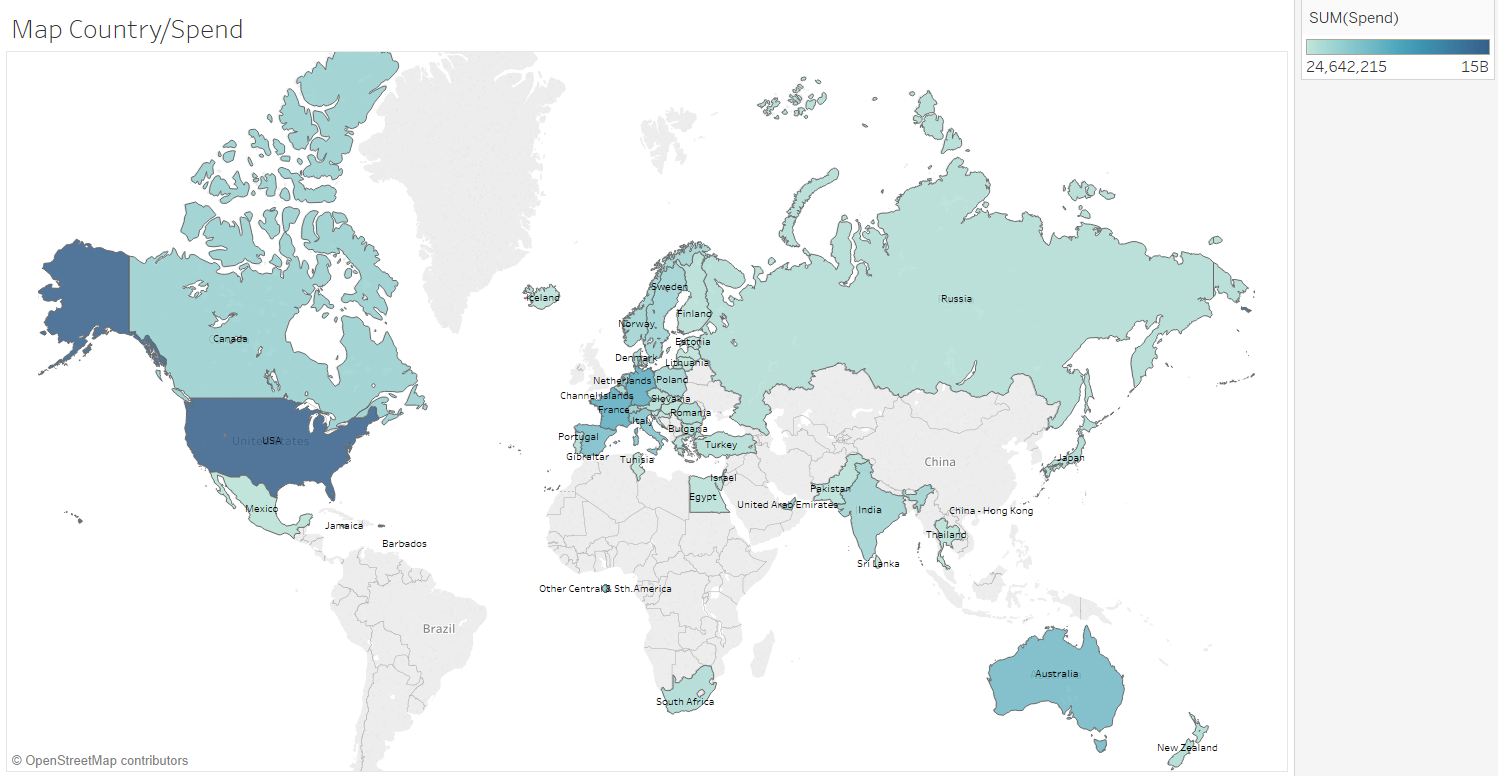

In [25]:
from IPython.display import Image
Image(filename = 'Ln15_Picnew_Map.png')

As envisaged following the scatter plot of sex vs spend and following findings from the above choropleth, it is seen in the below graph that the outliers in terms of male travellers spend is evident in the USA.

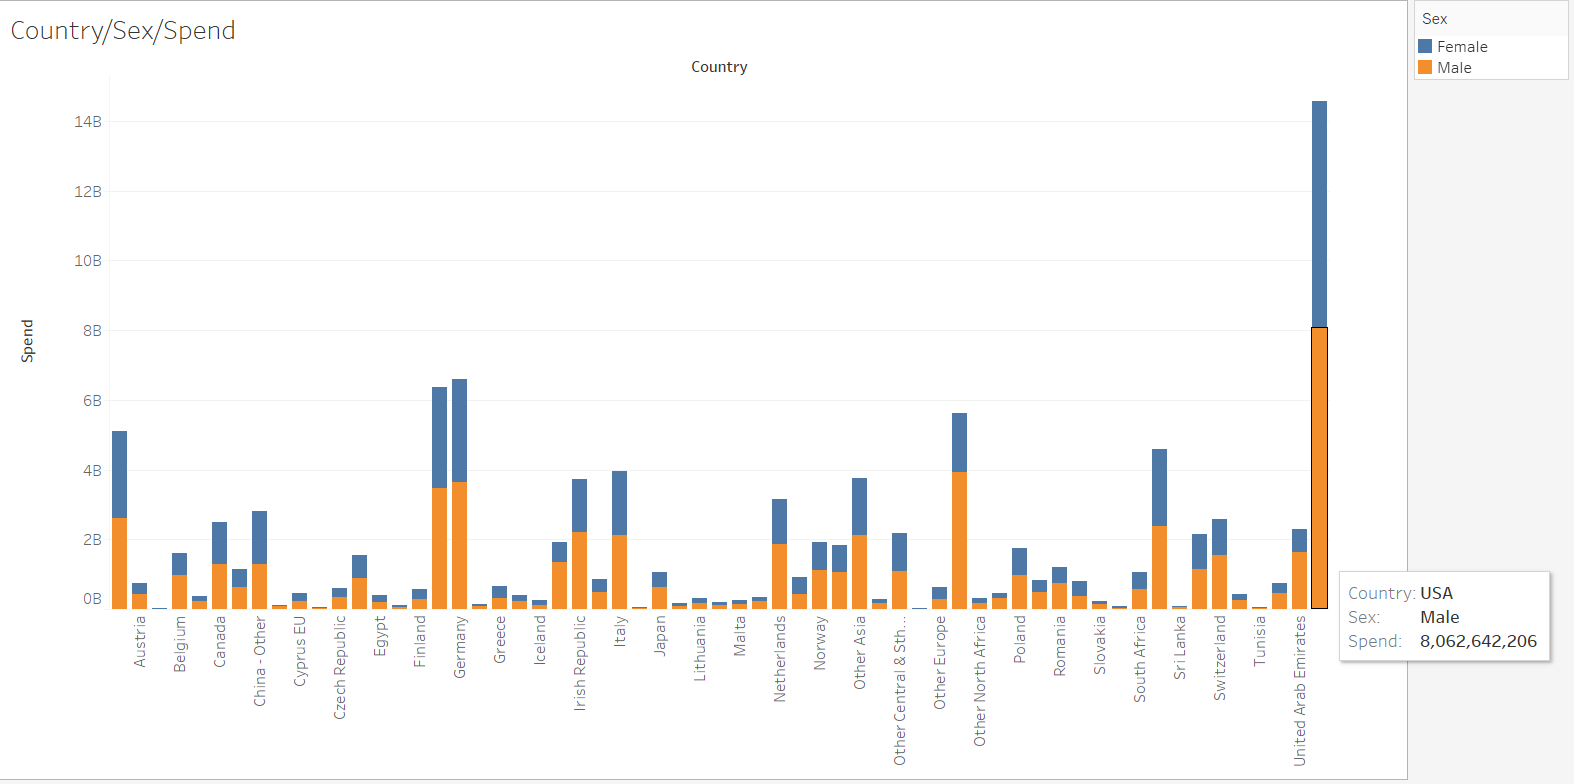

In [26]:
Image(filename = 'Ln15_Pic2_Bar.png')

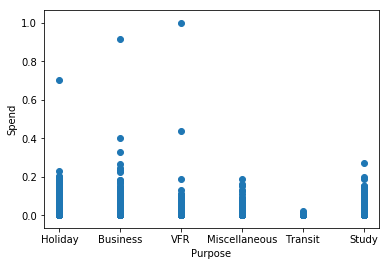

In [27]:
#check for any connection between purpose and spend
plt.scatter(Travel.purpose, Travel.spend)
plt.xlabel('Purpose')
plt.ylabel('Spend')
plt.show()

The above scatter plot of purpose vs spend has some obvious patterns. For example, those who travel to Visit a Friend or Relative (VFR) or on Business tend to spend more than those come on Transit or Study.

Further exploratory analysis on Tableau identified a notable pattern in spend. As seen in the graph below, there is an obvious spike in spend in Q3 in each year.

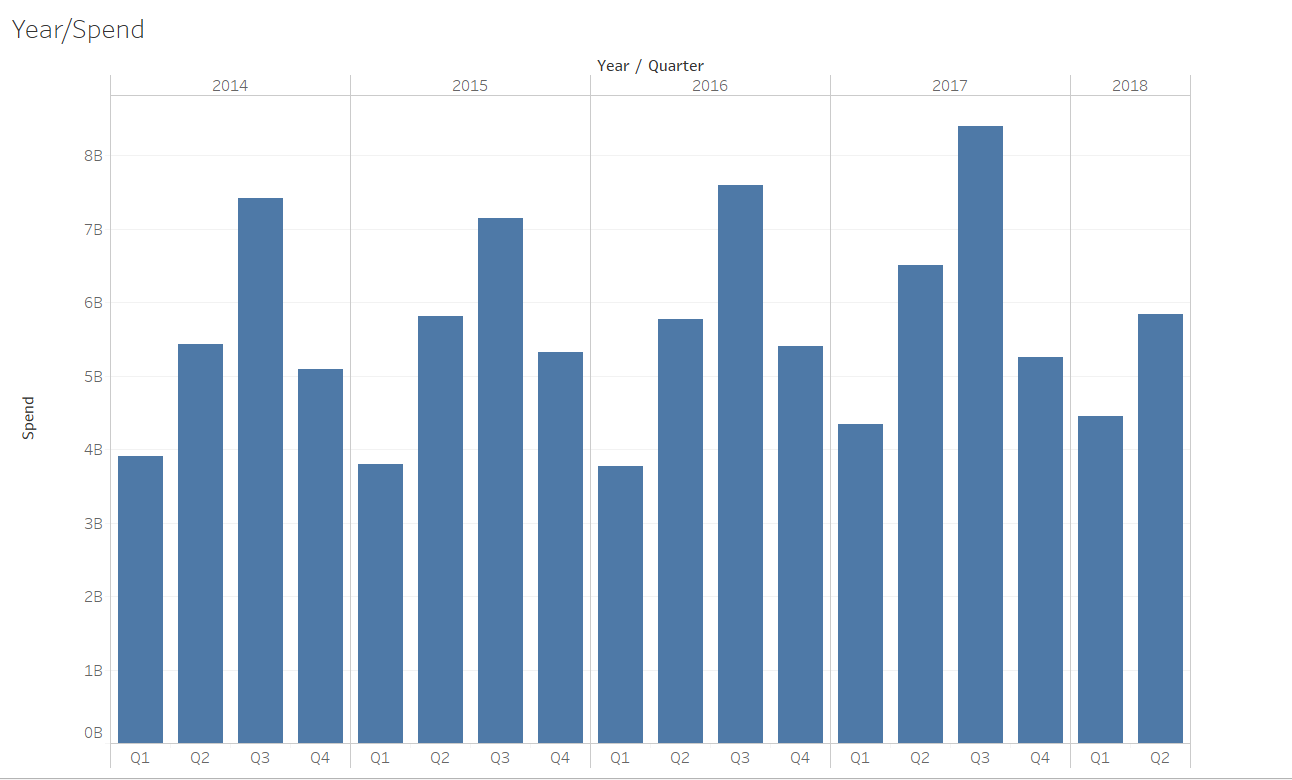

In [28]:
Image(filename = 'Ln16_Pic3_YearSpend.png')

## Section 3: Feature Derivation
<a id="fder"></a>

Feature derivation was performed to combine year and quarter as I would like to test if the model can predict the Q3 spend for 2018.

In [29]:
#combining the year and quarter columns to perform regression
Travel["period"] = Travel["Year"].map(str) + Travel["quarter"]

In [30]:
#check the change in the dataframe
Travel.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,spend,period
SlNo.,,,,,,,,,,,,,,
0,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,0,8.5,0.027841,0.009893,0.002848,2016Q1
1,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,7.5,1,2.0,0.009607,0.001547,0.000292,2016Q1
2,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,2.0,0.009607,0.000516,0.000820,2016Q1
3,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,0,8.5,0.033298,0.008767,0.002253,2016Q1
4,2016,Q1,Overseas residents,Air,Austria,Holiday,Independent,20.0,1,2.0,0.019205,0.003093,0.001287,2016Q1


Assigning incremental values to the 'period' column would assign weights to each of the rows and skew the regression model. Hence, one hot encoding using the pandas get_dummies was performed.

## Section 4: Modelling Process
<a id="model"></a>

## 4.1. Linear Regression Analysis
<a id="lra"></a>

A linear regression model is applied to predict the spend of 2018 Q3 using the values grouped by period from 2016Q1 onwards. 

In [31]:
#calculating total spend in each period
df_spend = Travel.groupby('period', as_index= False)['spend'].sum()
df_spend

,period,spend
0,2016Q1,15.806719
1,2016Q2,24.121944
2,2016Q3,31.869320
3,2016Q4,22.754768
4,2017Q1,18.253234
5,2017Q2,27.354953
6,2017Q3,35.322166
7,2017Q4,21.790787
8,2018Q1,18.585996
9,2018Q2,24.204313


In [32]:
#One hot encoding using get dummies method
period_dummies = pd.get_dummies(df_spend.period)
period_dummies

,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1


In [33]:
#concatenating spend with one hot encoded period
df_spend_merged = pd.concat([df_spend, period_dummies], axis = 'columns')

In [34]:
#check changes in the dataframe
df_spend_merged.head()

,period,spend,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2
0,2016Q1,15.806719,1,0,0,0,0,0,0,0,0,0
1,2016Q2,24.121944,0,1,0,0,0,0,0,0,0,0
2,2016Q3,31.869320,0,0,1,0,0,0,0,0,0,0
3,2016Q4,22.754768,0,0,0,1,0,0,0,0,0,0
4,2017Q1,18.253234,0,0,0,0,1,0,0,0,0,0


In [35]:
#dropping 2016Q1 to avoid dummy trap and period as it is not useful anymore
Final_df = df_spend_merged.drop(['period', '2016Q1'], axis = 'columns')

In [36]:
#check changes in the dataframe
Final_df.head()

,spend,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2
0,15.806719,0,0,0,0,0,0,0,0,0
1,24.121944,1,0,0,0,0,0,0,0,0
2,31.869320,0,1,0,0,0,0,0,0,0
3,22.754768,0,0,1,0,0,0,0,0,0
4,18.253234,0,0,0,1,0,0,0,0,0


In [37]:
#call linear regression
model = linear_model.LinearRegression()

In [38]:
#define x1 variable
x1 = Final_df.drop(['spend'], axis = 'columns')

In [39]:
#check the values of x1
x1

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1


In [40]:
#define y1 variable
y1 = Final_df.spend
y1

0    15.806719
1    24.121944
2    31.869320
3    22.754768
4    18.253234
5    27.354953
6    35.322166
7    21.790787
8    18.585996
9    24.204313
Name: spend, dtype: float64

In [41]:
#fit x1 and y1 variables in the model
model.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#final model
model.score(x1,y1)

1.0

In [43]:
#2018Q3 value
model.predict([[0,1,0,0,0,0,0,0,0]])

array([31.86931998])

In [44]:
#calculating the error metrics for the above model using mean absolute error method
from sklearn.metrics import mean_absolute_error
y_values = [24.121944, 31.86931998]
y_pred = [24.12194372, 31.869320]
print(mean_absolute_error(y_values, y_pred))

1.4999999820020093e-07


### Observations:
- The model results show a good r2 value of 100%. I have used the Mean Absolute Error (MAE) to calculate the error metrics the model as this residual operation is more robust to outliers. 
- Since the prediction outputs are close to the values in the dataset used for the model, the mean absolute error is a minimal figure.
- The model has been cross validated using k-fold cross validaiton method.

In [45]:
#perform k-fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x1, y1, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x1, y1, cv=folds)
    
    r2 = metrics.r2_score(y1, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [-1.47687484 -6.37363417 -2.36419501 -3.55123733 -3.95756426]
Mean CV R2: -3.5447011217916127
Std CV R2: 1.6639027066970098
Cross-Predicted R2: -2.042043440476159
------------------------------------

K: 6
Cross-validated scores: [-1.47687484 -6.37363417 -2.36419501 -3.55123733  0.          0.        ]
Mean CV R2: -2.2943235580446473
Std CV R2: 2.2144055970484744
Cross-Predicted R2: -2.042043440476159
------------------------------------

K: 7
Cross-validated scores: [-1.47687484 -6.37363417 -2.36419501  0.          0.          0.
  0.        ]
Mean CV R2: -1.4592434312029936
Std CV R2: 2.187237334759719
Cross-Predicted R2: -2.042043440476159
------------------------------------

K: 8
Cross-validated scores: [-1.47687484 -6.37363417  0.          0.          0.          0.
  0.          0.        ]
Mean CV R2: -0.9813136260363289
Std CV R2: 2.0946527260935626
Cross-Predicted R2: -2.042043440476159
-----------------------

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


All the cross validation r2 show a negative value thus confirming that our model was over-fitted due to the limited available data.

Since there are several countries from which overseas residents travel into the UK, I have grouped the data by country to see if there are any noticeable patterns.

In [46]:
#group visits, nights and spend by period and country
df_country = Travel.groupby(['period','country'])['visits','nights','spend'].sum().reset_index()
df_country

,period,country,visits,nights,spend
0,2016Q1,Australia,3.265729,2.596790,0.747475
1,2016Q1,Austria,1.218950,0.418520,0.106885
2,2016Q1,Barbados,0.025711,0.006301,0.003239
3,2016Q1,Belgium,4.117365,0.711638,0.207232
4,2016Q1,Bulgaria,0.985310,0.538552,0.059935
5,2016Q1,Canada,2.030727,1.330968,0.383854
6,2016Q1,China - Hong Kong,0.565657,0.295949,0.146966
7,2016Q1,China - Other,1.082278,1.177346,0.322823
8,2016Q1,Croatia,0.211030,0.057376,0.018600
9,2016Q1,Cyprus EU,0.730860,0.406808,0.079492


In [47]:
#one hot enconding on period
new_period_dummies = pd.get_dummies(df_country['period'])
new_period_dummies.head()

,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [48]:
#new dataframe for concatenation of one hot encoded period variables with df_country
df_new = pd.concat([new_period_dummies, df_country], axis ='columns')
df_new.head()

,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,period,country,visits,nights,spend
0,1,0,0,0,0,0,0,0,0,0,2016Q1,Australia,3.265729,2.596790,0.747475
1,1,0,0,0,0,0,0,0,0,0,2016Q1,Austria,1.218950,0.418520,0.106885
2,1,0,0,0,0,0,0,0,0,0,2016Q1,Barbados,0.025711,0.006301,0.003239
3,1,0,0,0,0,0,0,0,0,0,2016Q1,Belgium,4.117365,0.711638,0.207232
4,1,0,0,0,0,0,0,0,0,0,2016Q1,Bulgaria,0.985310,0.538552,0.059935


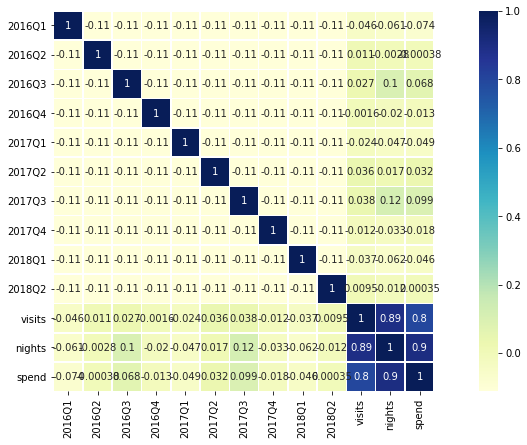

In [49]:
#visualising the correlation matrix for the new dataframe
plt.figure(figsize =(16,7))
sb.heatmap(df_new.corr(), cmap="YlGnBu", linewidths=0.5, square=True, annot=True)

Visits and nights are still having the higher correlation with spend. A combination of regression analyses were performed to see if visits and nights data from the dataset can be used to predict spend. The aim is to see which combination would be ideal.

Since nights has the highest correlation to spend, it was first tested.

In [50]:
#removing period and 2016Q1 to exclude unnecessary column and avoid dummy trap respectively
df_new = df_new.drop(['period','2016Q1'], axis ='columns')
df_new.head()

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,country,visits,nights,spend
0,0,0,0,0,0,0,0,0,0,Australia,3.265729,2.596790,0.747475
1,0,0,0,0,0,0,0,0,0,Austria,1.218950,0.418520,0.106885
2,0,0,0,0,0,0,0,0,0,Barbados,0.025711,0.006301,0.003239
3,0,0,0,0,0,0,0,0,0,Belgium,4.117365,0.711638,0.207232
4,0,0,0,0,0,0,0,0,0,Bulgaria,0.985310,0.538552,0.059935


In [51]:
#define x2 varaible
x2 = df_new['nights']

In [52]:
#define y2 vairable
y2 = df_new['spend']

In [53]:
#fit the variables in the model
model.fit(x2.values.reshape(-1,1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#determine the score of the model
model.score(x2.values.reshape(-1,1),y2)

0.8170595156923154

In [55]:
#predict using the model
model.predict([[0.711638]])

array([0.22489899])

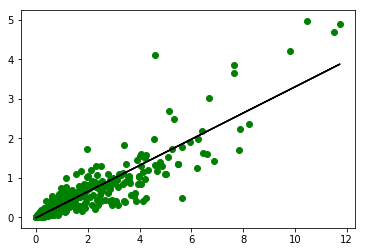

In [56]:
#visualise the fitted line on the scatter plot of the variables
plt.scatter(x2,y2, color ='g')
plt.plot(x2.values.reshape(-1,1), model.predict(x2.values.reshape(-1,1)),color = 'k')
plt.show()

In [57]:
#calculating the error metrics
from sklearn.metrics import mean_absolute_error
y_values = [0.747475, 0.207232]
y_pred = [0.84987003, 0.22489899]
print(mean_absolute_error(y_values, y_pred))

0.060031010000000024


### Observations:
- The above linear regression model shows a 81.7% r2 value which isn't a perfect model. However, the plot shows the fitted line is relatively good fit for this datset, although identifying some outliers.
- The MAE value is 0.06 which is a reasonably small number compared to the range of our input.


In [467]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x2.values.reshape(-1,1), y2, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x2.values.reshape(-1,1), y2, cv=folds)
    
    r2 = metrics.r2_score(y2, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [0.79592273 0.80375056 0.85101573 0.78300426 0.8567176 ]
Mean CV R2: 0.818082177115081
Std CV R2: 0.030014036501623008
Cross-Predicted R2: 0.8154642828234748
------------------------------------

K: 6
Cross-validated scores: [0.80592422 0.80447581 0.76431827 0.86993682 0.77071949 0.84947076]
Mean CV R2: 0.8108075590931462
Std CV R2: 0.038347875662019665
Cross-Predicted R2: 0.8137791458992916
------------------------------------

K: 7
Cross-validated scores: [0.79436687 0.75185706 0.83444212 0.8330099  0.79434064 0.84111337
 0.84784366]
Mean CV R2: 0.8138533734893392
Std CV R2: 0.03227854175782376
Cross-Predicted R2: 0.8129106761058053
------------------------------------

K: 8
Cross-validated scores: [0.72632961 0.82321072 0.8008922  0.76653925 0.88782511 0.76162379
 0.80171753 0.86688241]
Mean CV R2: 0.8043775790897244
Std CV R2: 0.050738749677560785
Cross-Predicted R2: 0.8149274118644165
------------------------------

Based on the cross-validated r2 scores, it is evident that 5-fold cross validation method is most favourable for this model.

As established before, travellers from the USA spend the highest in the UK however as can be seen in the scatter plot below, this is despite the fact that there are countries, such as France, from where travellers have made more number of visits. The below scatter plot hence identifies that both visits and nights are equally important to determine the spend. This lead to the below multiple linear regression model which considers both visits and nights per period to predict spend.

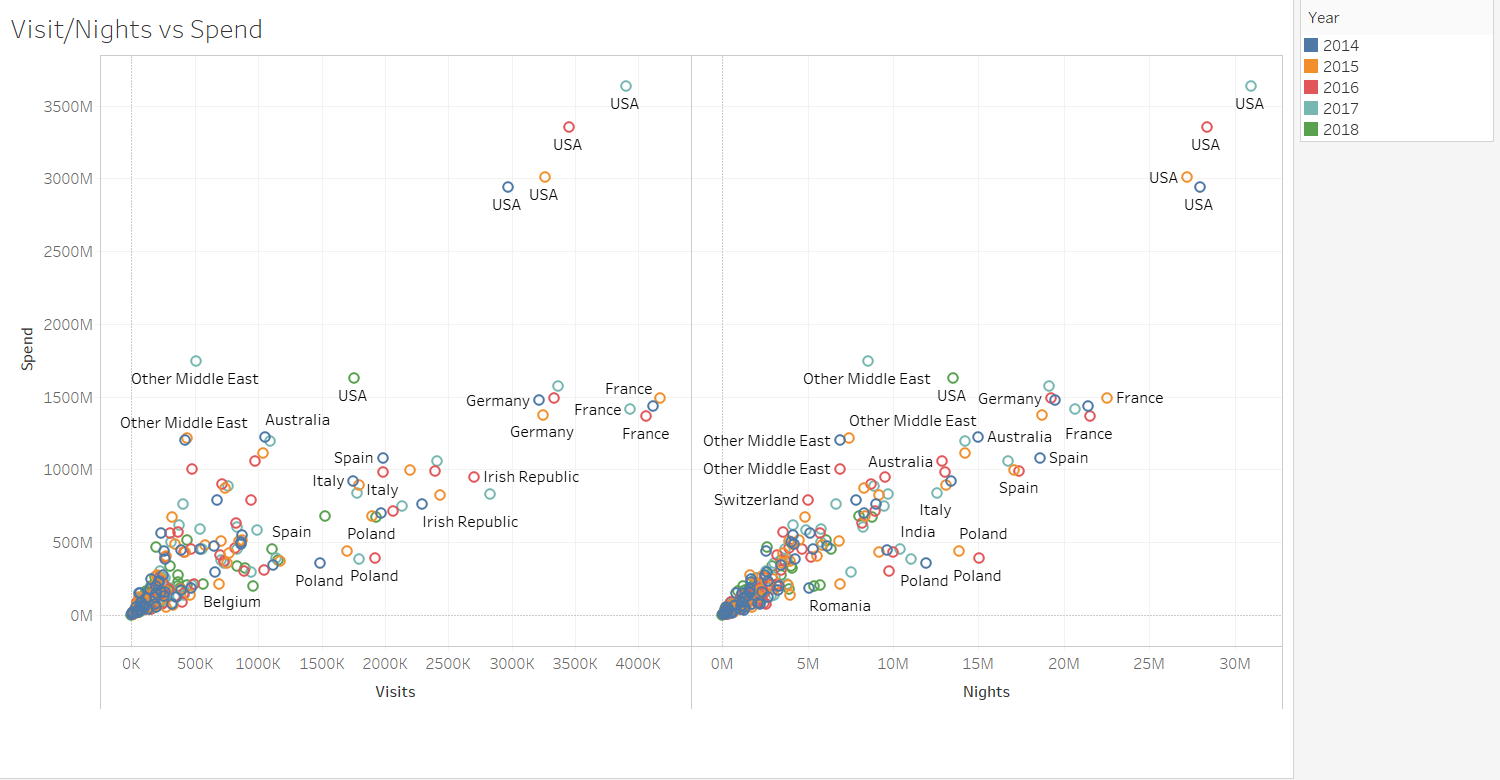

In [58]:
Image(filename = 'Ln47_Pic4_VisitsSpend.png')

## 4.2. Multiple Linear Regression Analysis
<a id="mlra"></a>

In [59]:
#check the dataframe
df_new.head()

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,country,visits,nights,spend
0,0,0,0,0,0,0,0,0,0,Australia,3.265729,2.596790,0.747475
1,0,0,0,0,0,0,0,0,0,Austria,1.218950,0.418520,0.106885
2,0,0,0,0,0,0,0,0,0,Barbados,0.025711,0.006301,0.003239
3,0,0,0,0,0,0,0,0,0,Belgium,4.117365,0.711638,0.207232
4,0,0,0,0,0,0,0,0,0,Bulgaria,0.985310,0.538552,0.059935


In [60]:
#define x3 variable
x3 = df_new.drop(['spend','country'], axis ='columns')
x3.head()

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,visits,nights
0,0,0,0,0,0,0,0,0,0,3.265729,2.596790
1,0,0,0,0,0,0,0,0,0,1.218950,0.418520
2,0,0,0,0,0,0,0,0,0,0.025711,0.006301
3,0,0,0,0,0,0,0,0,0,4.117365,0.711638
4,0,0,0,0,0,0,0,0,0,0.985310,0.538552


In [61]:
#fit the variables in the model
model.fit(x3,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#determine the model's score
model.score(x3,y2)

0.8193756771812928

In [63]:
#predict values
model.predict([[0,0,0,0,0,0,0,0,0,4.117365,0.711638]])

array([0.17255737])

In [64]:
#calculating the error metrics
from sklearn.metrics import mean_absolute_error
y_values = [0.747475, 0.207232]
y_pred = [0.84463613, 0.17255737]
print(mean_absolute_error(y_values, y_pred))

0.06591788000000003


### Observations: 
- From the above multiple linear regression model, it is evident that the variables period, visits and nights, as a combination, have a higher r2 value for predicting spend.
- The MAE shows that the model misses the actual value by 0.065.

In [65]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x3, y2, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x3, y2, cv=folds)
    
    r2 = metrics.r2_score(y2, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [0.79481105 0.67498082 0.84776527 0.78131314 0.84718124]
Mean CV R2: 0.7892103034522602
Std CV R2: 0.06313702800631454
Cross-Predicted R2: 0.7816481652225635
------------------------------------

K: 6
Cross-validated scores: [0.80678326 0.80282459 0.71308574 0.84302836 0.76141604 0.84351958]
Mean CV R2: 0.7951095957622281
Std CV R2: 0.04600488918680998
Cross-Predicted R2: 0.7994177935231348
------------------------------------

K: 7
Cross-validated scores: [0.79271631 0.67725422 0.82520781 0.82844638 0.79414719 0.82552977
 0.84383375]
Mean CV R2: 0.7981622058139731
Std CV R2: 0.05230130839510475
Cross-Predicted R2: 0.7987305702929843
------------------------------------

K: 8
Cross-validated scores: [0.72119944 0.82021096 0.78746538 0.76769749 0.88435648 0.76285226
 0.79538191 0.86118891]
Mean CV R2: 0.8000441021662056
Std CV R2: 0.05009983090028286
Cross-Predicted R2: 0.8110800732971611
--------------------------------

Based on the above cross-validation iteration, it can be seen that 8-fold cross validation method is most favourable for this model with a 81.1% r2 value.

Since the range of spend is large, using Tableau, the top 10 countries with highest spend were identified to narrow down the approach. I have chosen top 10 countries as I would like to focus on countries associated with the upper end of the spending range. A multiple linear regression model was then applied to predict spend given period,country, visits and nights data.

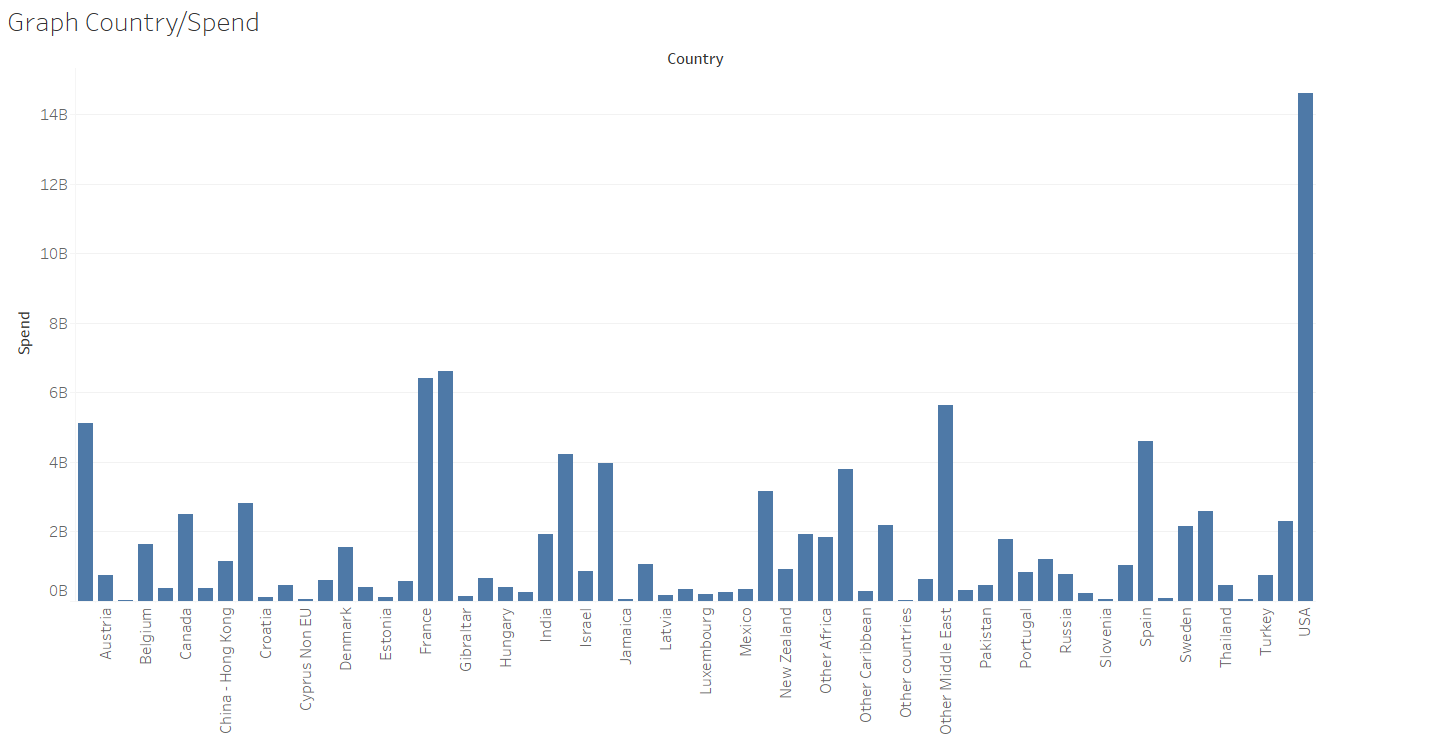

In [66]:
Image(filename = 'Ln53_Pic5_CountrySpend.png')

In [67]:
#create a list of top 10 countries in terms of spend
countries = ['USA','Germany','France','Australia','Other Middle East','Spain','Irish Republic','Italy','Other Asia','Netherlands']

Since the country column has string values, it has to be encoded in order to assign binary numeric values. One hot encoding using the pandas get_dummies method was employed for this purpose.

In [68]:
#create a dataframe to identify values associated with these countries
df_country_1 = df_new[df_new.country.isin(countries)]
df_country_1.head()

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,country,visits,nights,spend
0,0,0,0,0,0,0,0,0,0,Australia,3.265729,2.596790,0.747475
16,0,0,0,0,0,0,0,0,0,France,18.704961,4.672904,1.175099
17,0,0,0,0,0,0,0,0,0,Germany,12.527600,3.148238,0.949098
23,0,0,0,0,0,0,0,0,0,Irish Republic,12.019658,2.291647,0.885018
25,0,0,0,0,0,0,0,0,0,Italy,7.852520,2.538831,0.675610


In [69]:
#determine the shape of the dataframe
df_country_1.shape

(100, 13)

In [70]:
#one hot encoding on the countries to assign values for each country
country_dummies = pd.get_dummies(df_country_1.country)
country_dummies.head()

,Australia,France,Germany,Irish Republic,Italy,Netherlands,Other Asia,Other Middle East,Spain,USA
0,1,0,0,0,0,0,0,0,0,0
16,0,1,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0
23,0,0,0,1,0,0,0,0,0,0
25,0,0,0,0,1,0,0,0,0,0


In [71]:
#check the shape of the encoded country variable
country_dummies.shape

(100, 10)

In [72]:
#concatenate the encoded country columns to the dataframe
df_latest = pd.concat([df_country_1, country_dummies], axis = 'columns')
df_latest

,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,country,...,Australia,France,Germany,Irish Republic,Italy,Netherlands,Other Asia,Other Middle East,Spain,USA
0,0,0,0,0,0,0,0,0,0,Australia,...,1,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,France,...,0,1,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,Germany,...,0,0,1,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,Irish Republic,...,0,0,0,1,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,Italy,...,0,0,0,0,1,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,Netherlands,...,0,0,0,0,0,1,0,0,0,0
37,0,0,0,0,0,0,0,0,0,Other Asia,...,0,0,0,0,0,0,1,0,0,0
41,0,0,0,0,0,0,0,0,0,Other Middle East,...,0,0,0,0,0,0,0,1,0,0
52,0,0,0,0,0,0,0,0,0,Spain,...,0,0,0,0,0,0,0,0,1,0
59,0,0,0,0,0,0,0,0,0,USA,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#determine the shape of the dataframe
df_latest.shape

(100, 23)

In [74]:
#define x4 variable
x4 = df_latest.drop(['spend','country'], axis = 'columns')

In [75]:
#define y3 variable
y3 = df_latest['spend']

In [76]:
#fit the variables in the model
model.fit(x4,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
#determine the score of the model
model.score(x4, y3)

0.9267744439936891

In [78]:
#predict spend using the model
model.predict([[0,0,0,0,0,0,0,0,0,18.704961,4.672904,0,1,0,0,0,0,0,0,0,0]])

array([1.06636545])

In [79]:
#validating the above model using mean absolute error method (in millions)
from sklearn.metrics import mean_absolute_error
y_values = [0.747475, 1.175099]
y_pred = [0.73476646, 1.06636545]
print(mean_absolute_error(y_values, y_pred))

0.060721044999999974


### Observations:
- The r2 value of 92.6% indicates that a combination of period, country, visits and nights works most favourably in prediction of spend. As it can be seen, with the increasing number of variables considered, the accuracy of the model is improving.
- The MAE shows the model misses the actual value by 0.06. Given the spending range, it is not a very large variation.

In [80]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x4, y3, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x4, y3, cv=folds)
    
    r2 = metrics.r2_score(y3, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [0.91184532 0.92086115 0.96541648 0.77436499 0.93333404]
Mean CV R2: 0.9011643938911067
Std CV R2: 0.06594444725975437
Cross-Predicted R2: 0.8934892743504297
------------------------------------

K: 6
Cross-validated scores: [0.82424702 0.91205793 0.93277588 0.72405258 0.94602294 0.95502724]
Mean CV R2: 0.8823639320609358
Std CV R2: 0.08286090992571192
Cross-Predicted R2: 0.8859149402269195
------------------------------------

K: 7
Cross-validated scores: [0.85284287 0.92391886 0.91105525 0.73617671 0.78010077 0.6811005
 0.95224763]
Mean CV R2: 0.833920371049613
Std CV R2: 0.09577742483160408
Cross-Predicted R2: 0.8712108096562173
------------------------------------

K: 8
Cross-validated scores: [0.8566878  0.91285907 0.93421188 0.9587201  0.90782358 0.69902338
 0.88710481 0.96135714]
Mean CV R2: 0.8897234716334312
Std CV R2: 0.07921390507924639
Cross-Predicted R2: 0.8804632100941576
----------------------------------

The cross validation r2 score from the 5-fold cross validation is 89.3% which is close to the r2 produced by the regression model. It can be seen that the 5-fold cross validation technique is ideal for this model.

Since spending patterns often vary by age, sex and country, a multiple linear regression was run on this combination of features.

In [81]:
#group by age, sex and country to visualise spend for each category
df_country_2 = Travel.groupby(['country','Age','Sex'], as_index = False)['spend'].sum()
df_country_2.head()

,country,Age,Sex,spend
0,Australia,0.0,0,0.010240
1,Australia,0.0,1,0.003017
2,Australia,7.5,0,0.062769
3,Australia,7.5,1,0.104121
4,Australia,20.0,0,0.447014


In [82]:
#one hot encoding the country variable
country_2_dummies = pd.get_dummies(df_country_2['country'])
country_2_dummies.head()

,Australia,Austria,Barbados,Belgium,Bulgaria,Canada,China - Hong Kong,China - Other,Croatia,Cyprus EU,...,South Africa,Spain,Sri Lanka,Sweden,Switzerland,Thailand,Tunisia,Turkey,USA,United Arab Emirates
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#concatenate the one hot encoded columns to the dataframe
df_country_2 = pd.concat([df_country_2, country_2_dummies], axis ='columns')
df_country_2.head()

,country,Age,Sex,spend,Australia,Austria,Barbados,Belgium,Bulgaria,Canada,...,South Africa,Spain,Sri Lanka,Sweden,Switzerland,Thailand,Tunisia,Turkey,USA,United Arab Emirates
0,Australia,0.0,0,0.010240,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Australia,0.0,1,0.003017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Australia,7.5,0,0.062769,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Australia,7.5,1,0.104121,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Australia,20.0,0,0.447014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#define x5 variable
x5 = df_country_2.drop((['spend','country']), axis = 'columns')

In [85]:
#define y5 variable
y5 = df_country_2.spend

In [86]:
#fit the model
model.fit(x5,y5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
#calculate the score of the model
model.score(x5,y5)

0.582568029894586

### Observations:
Based on the r2 value of the above model, it is evident that this combination of features does not work favourably to predict spend.

In [88]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x5, y5, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x5, y5, cv=folds)
    
    r2 = metrics.r2_score(y5, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [-2.14685882e+22  8.40426763e-03 -5.57647774e+23 -1.33168832e-02
 -2.77269405e-02]
Mean CV R2: -1.158232724208389e+23
Std CV R2: 2.2106867161831502e+23
Cross-Predicted R2: -3.1262774745091965e+22
------------------------------------

K: 6
Cross-validated scores: [-1.74703876e+16 -6.81769357e-03 -6.30622422e+21  6.83721081e-02
 -2.05872501e-02 -6.60638823e-02]
Mean CV R2: -1.0510402818466344e+21
Std CV R2: 2.3501897043134002e+21
Cross-Predicted R2: -3.84041564845132e+20
------------------------------------

K: 7
Cross-validated scores: [-2.43571732e+17 -7.60336727e+22 -7.54690678e+18 -2.05052515e+23
  2.92750424e-04 -1.64478479e+00 -1.05658337e-01]
Mean CV R2: -4.015628256410802e+22
Std CV R2: 7.2249531932705265e+22
Cross-Predicted R2: -1.1775153921913023e+22
------------------------------------

K: 8
Cross-validated scores: [-1.97498953e+23 -6.10264181e+22 -1.25249594e+20 -8.90040771e+21
 -2.58987471e-01 -8.20442490e-02

The cross-validation scores have proven that the model cannot evaluate the required prediction using age, country and sex.

## 4.3. Logistic Regression
<a id="logreg"></a>

Since 'Age' and 'Duration' are independent variables as per the correlation matrix and since sex is a binary variable, a logistic regression has been run to test if the sex of the traveller can be determined given their age and planned duraiton of travel.

In [89]:
#import the packages
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [90]:
#fix the figure sizes
%matplotlib inline
rcParams['figure.figsize'] = 5,4

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


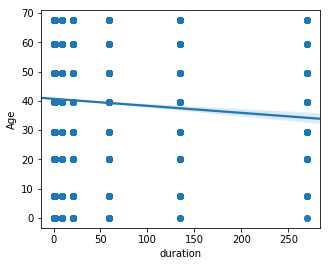

In [91]:
#plot the variables to see if there is any correlation
sb.regplot(x = Travel['duration'], y= Travel['Age'],data = Travel, scatter = True)

In [92]:
#check the spearman coefficient
duration = Travel['duration']
Age = Travel['Age']
spearmanr_coefficient, p_value = spearmanr(duration, Age)
print (spearmanr_coefficient)

0.003635870814033551


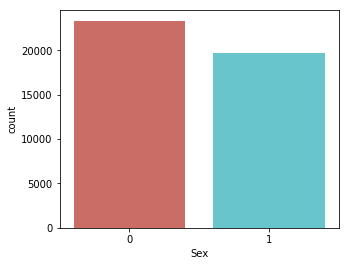

In [93]:
#visualise to see if the prediction is a binary variable
sb.countplot(x = Travel['Sex'], data = Travel, palette ='hls')

In [94]:
#define y variable
Travel_data = Travel.ix[:, (7,9)].values
Travel_data_names = {'Age', 'duration'}

y = Travel.ix[:,8].values

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [95]:
#define X variable
X = scale(Travel_data)

In [96]:
#call the logistic regression function
LogReg = LogisticRegression()

In [97]:
#X and Y are fitted to the model
LogReg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
#calculate the model score
LogReg.score(X, y)

0.5439591078066914

In [99]:
#predicted values are assigned
y_pred = LogReg.predict(X)

In [100]:
#import the classification report
from sklearn.metrics import classification_report

In [101]:
#print the classification report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.55      0.93      0.69     23332
          1       0.51      0.08      0.14     19708

avg / total       0.53      0.54      0.44     43040



In [102]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [103]:
#Generate the confusion matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[21794  1538]
 [18090  1618]]


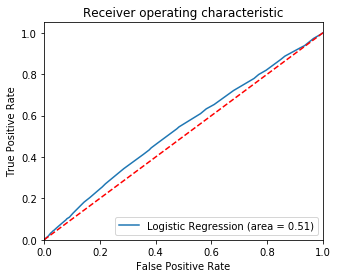

In [104]:
#plot the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, LogReg.predict(X))
fpr, tpr, thresholds = roc_curve(y, LogReg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Observations:
Since the Area Under the Curve (AUC) is 0.51, it validates that the model doesn't have the capacity to distinguish between male and female travellers hence Age and duration as a combination do not support this prediction.

## Section 5: Testing for correlation with Retail Data
<a id="retail"></a>

Tourism spend (in this case from overseas residents) often impacts the retail sector among others. A linear regression model was used to test if the spend by tourists can predict the reatil revenue for the future quarters. The quarter-wise breakup of data for both tourism spend and retail revenue was collected from 1996 in order to have substantial data for this model

In [105]:
#read the files with the travel spend and retail revenue data
Travel_All_Years = pd.read_excel('Travelpac_All_Years.xlsx')
Retail = pd.read_excel('Master_RR.xlsx')

In [106]:
#check the columns in travel data
Travel_All_Years.head()

,YEAR,QUARTER,Spend
0,1996,Q1,5.239371e+09
1,1996,Q2,6.982316e+09
2,1996,Q3,9.906091e+09
3,1996,Q4,6.385735e+09
4,1997,Q1,5.294012e+09


In [107]:
#check columns in Retail data
Retail.head()

,Period,Retail
0,1996Q1,17216876
1,1996Q1,14369109
2,1996Q1,18342595
3,1996Q2,15072266
4,1996Q2,14821121


In [108]:
#feature derivation - creating a period column in order to have similar fields to map travel and retail data.
Travel_All_Years["Period1"] = Travel_All_Years["YEAR"].map(str) + Travel_All_Years["QUARTER"]

In [109]:
#check dataframe for above columns
Travel_All_Years.head()

,YEAR,QUARTER,Spend,Period1
0,1996,Q1,5.239371e+09,1996Q1
1,1996,Q2,6.982316e+09,1996Q2
2,1996,Q3,9.906091e+09,1996Q3
3,1996,Q4,6.385735e+09,1996Q4
4,1997,Q1,5.294012e+09,1997Q1


In [110]:
#grouping retail data to combine the values for each quarter in each year
Retail_new = Retail.groupby(['Period'])['Retail'].sum().reset_index()

##### Note: The retail revenue data is in 1000s so the 'Retail' columns needs to be multiplied by 1000 to consider the actual value.

In [111]:
#converting retail data to its actual value
Retail_new['Retail']*=1000

In [112]:
#checking the changes in the dataframe
Retail_new.head()

,Period,Retail
0,1996Q1,49928580000
1,1996Q2,48925233000
2,1996Q3,49276637000
3,1996Q4,57832798000
4,1997Q1,48892506000


In [113]:
#create a dataframe merging the two dataframes - Travel_All_Years and Retail_new
Merged_df = pd.concat([Travel_All_Years, Retail_new], axis ='columns')
Merged_df

,YEAR,QUARTER,Spend,Period1,Period,Retail
0,1996,Q1,5.239371e+09,1996Q1,1996Q1,49928580000
1,1996,Q2,6.982316e+09,1996Q2,1996Q2,48925233000
2,1996,Q3,9.906091e+09,1996Q3,1996Q3,49276637000
3,1996,Q4,6.385735e+09,1996Q4,1996Q4,57832798000
4,1997,Q1,5.294012e+09,1997Q1,1997Q1,48892506000
5,1997,Q2,7.244989e+09,1997Q2,1997Q2,51312696000
6,1997,Q3,1.012776e+10,1997Q3,1997Q3,51809811000
7,1997,Q4,6.507780e+09,1997Q4,1997Q4,61128998000
8,1998,Q1,5.895738e+09,1998Q1,1998Q1,51328912000
9,1998,Q2,8.085261e+09,1998Q2,1998Q2,53365211000


In [114]:
#Getting rid of duplicate period column
Merged_df = Merged_df.drop(['Period1'], axis ='columns')
Merged_df.head()

,YEAR,QUARTER,Spend,Period,Retail
0,1996,Q1,5.239371e+09,1996Q1,49928580000
1,1996,Q2,6.982316e+09,1996Q2,48925233000
2,1996,Q3,9.906091e+09,1996Q3,49276637000
3,1996,Q4,6.385735e+09,1996Q4,57832798000
4,1997,Q1,5.294012e+09,1997Q1,48892506000


The 'Spend' and 'Retail' columns have been individually normalised using the MinMaxScaler in order to bring the values within the same range.

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


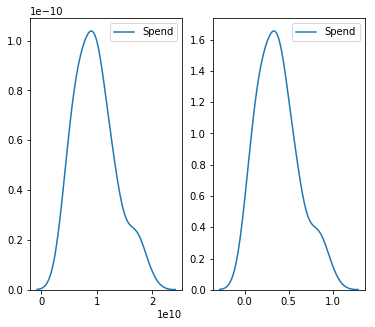

In [115]:
#normalise Spend using MinMaxScaler
df_4 = pd.DataFrame(Merged_df['Spend'])


scaled_df_4 = scaler.fit_transform(df_4.values.reshape(-1,1))
scaled_df_4 = pd.DataFrame(scaled_df_4, columns=['Spend'])



fig, (ax7, ax8) = plt.subplots(ncols=2, figsize =(6,5))
ax5.set_title('Before Scaling')
sb.kdeplot(df_4['Spend'], ax=ax7)
ax6.set_title('After Min-Max Scaling')
sb.kdeplot(scaled_df_4['Spend'], ax=ax8)

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


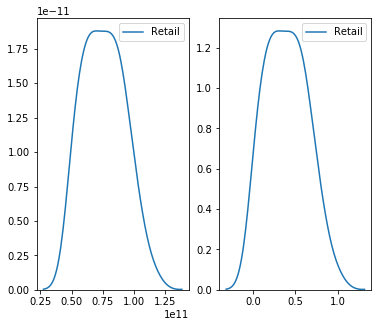

In [116]:
#Normalise Retail using MinMaxScaler
df_5 = pd.DataFrame(Merged_df['Retail'])


scaled_df_5 = scaler.fit_transform(df_5.values.reshape(-1,1))
scaled_df_5 = pd.DataFrame(scaled_df_5, columns=['Retail'])



fig, (ax9, ax10) = plt.subplots(ncols=2, figsize =(6,5))
ax5.set_title('Before Scaling')
sb.kdeplot(df_5['Retail'], ax=ax9)
ax6.set_title('After Min-Max Scaling')
sb.kdeplot(scaled_df_5['Retail'], ax=ax10)

In [117]:
#Drop the Spend and Retail columns with the original values
Merged_df = Merged_df.drop(['Spend','Retail'], axis ='columns')
Merged_df.head()

,YEAR,QUARTER,Period
0,1996,Q1,1996Q1
1,1996,Q2,1996Q2
2,1996,Q3,1996Q3
3,1996,Q4,1996Q4
4,1997,Q1,1997Q1


In [118]:
#concatenate the new values to the dataframe
Merged_df = pd.concat((Merged_df, scaled_df_4, scaled_df_5), axis ='columns')

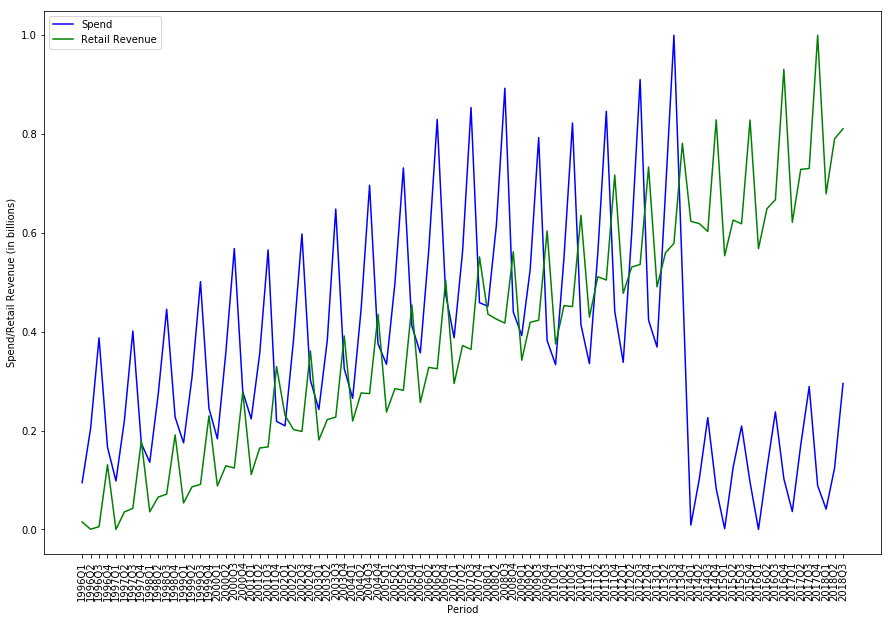

In [119]:
#plot the Spend and Retail Revenue against period
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
fig, ax = plt.subplots()
ax.plot(Merged_df['Period'], Merged_df['Spend'], 'b', label = 'Spend')
ax.plot(Merged_df['Period'], Merged_df['Retail'],'g', label ='Retail Revenue')
plt.xlabel ('Period')
plt.ylabel ('Spend/Retail Revenue (in billions)')
plt.legend (loc = "upper left")
plt.xticks(rotation =90)
plt.show()

The above graph shows that there are periodic spikes in both Spend and Retail Revenue. However, the Spend has a consistent spike in Q3 of every year whereas Retail Revenue has a spike in Q4 of every year.

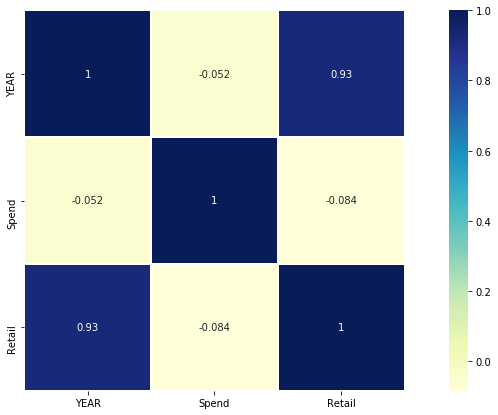

In [120]:
#plot the correlation matrix
plt.figure(figsize=(16,7))
sb.heatmap(Merged_df.corr(), cmap="YlGnBu", linewidths=0.5, square=True, annot=True)

Since there is a high correlation between 'YEAR' and 'Spend' as well as 'YEAR' and 'Retail', a multiple linear regression was run to investigate this combination.

In [121]:
Merged_df

,YEAR,QUARTER,Period,Spend,Retail
0,1996,Q1,1996Q1,0.094751,0.015184
1,1996,Q2,1996Q2,0.204159,0.000480
2,1996,Q3,1996Q3,0.387691,0.005629
3,1996,Q4,1996Q4,0.166711,0.131020
4,1997,Q1,1997Q1,0.098181,0.000000
5,1997,Q2,1997Q2,0.220648,0.035468
6,1997,Q3,1997Q3,0.401606,0.042753
7,1997,Q4,1997Q4,0.174372,0.179326
8,1998,Q1,1998Q1,0.135952,0.035706
9,1998,Q2,1998Q2,0.273394,0.065548


In [122]:
#define x6 variable
x6 = Merged_df.drop((['QUARTER','Period','Retail']), axis = 'columns')

In [123]:
#define y6 variable
y6 = Merged_df.Retail

In [124]:
#fit the variables into the model
model.fit(x6, y6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
#calculate the model score
model.score(x6,y6)

0.8598929613977594

In [126]:
#predict the values through the model
model.predict([[2018, 0.295446]])

array([0.77782489])

In [127]:
#validating the above model using mean absolute error method (in billions)
from sklearn.metrics import mean_absolute_error
y_values = [0.015184, 0.810767]
y_pred = [0.03482777, 0.77782489]
print(mean_absolute_error(y_values, y_pred))

0.026292940000000015


### Observations:
- Given the range of values, the r2 value, 85.98%, shows a reasonable fit to the model.
- The MAE shows that the model misses the actual value by 0.026.

In [128]:
# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    
    # Perform cross-validation
    scores = cross_val_score(model, x6, y6, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x6, y6, cv=folds)
    
    r2 = metrics.r2_score(y6, predictions)
    print ("Cross-Predicted R2:", r2)

------------------------------------

K: 5
Cross-validated scores: [-0.00624116  0.0125139   0.11446934  0.09163874  0.07168541]
Mean CV R2: 0.056813247045555015
Std CV R2: 0.0462525957810381
Cross-Predicted R2: 0.856650516371433
------------------------------------

K: 6
Cross-validated scores: [ 0.1646297   0.10699245 -0.14903128 -0.18343596  0.0710878   0.02845789]
Mean CV R2: 0.006450099889087508
Std CV R2: 0.12911435233652524
Cross-Predicted R2: 0.8554559206766205
------------------------------------

K: 7
Cross-validated scores: [-0.03182826  0.16460684 -0.15338881  0.04247644  0.04833761 -0.07415923
  0.01017343]
Mean CV R2: 0.0008882899576722695
Std CV R2: 0.09363677244785161
Cross-Predicted R2: 0.8584888681310995
------------------------------------

K: 8
Cross-validated scores: [ 0.11201789  0.14952907  0.07666365 -0.09800921 -0.4419157  -0.08998853
 -0.07309119  0.01799702]
Mean CV R2: -0.043349624515465035
Std CV R2: 0.1747892245435427
Cross-Predicted R2: 0.8588822842374462

The cross validation iterations scores show that the 8-fold cross validation method is most favourable for this model with an r2 value of 85.88%.

## Section 6: Testing for correlation with Currency Exchange Rate data
<a id="currency"></a>

- A list of countries from each continent were selected based on currency to test this correlation. The countries included: EU (includes countries from Europe that use Euro currency), USA (USD), Middle East (AED), India (INR), Japan(JPY), China (CNY), Australia (AUD) and New Zealand (NZD).
- Upon visualisation of country-wise spend from 2014 - 2018 across quarters, it was noticed that India, Japan, China and New Zealand did not contribute much to the overall spend, hence these were excluded from further analysis.
- The below chart displays the country-wise spend for the rest of the countries.


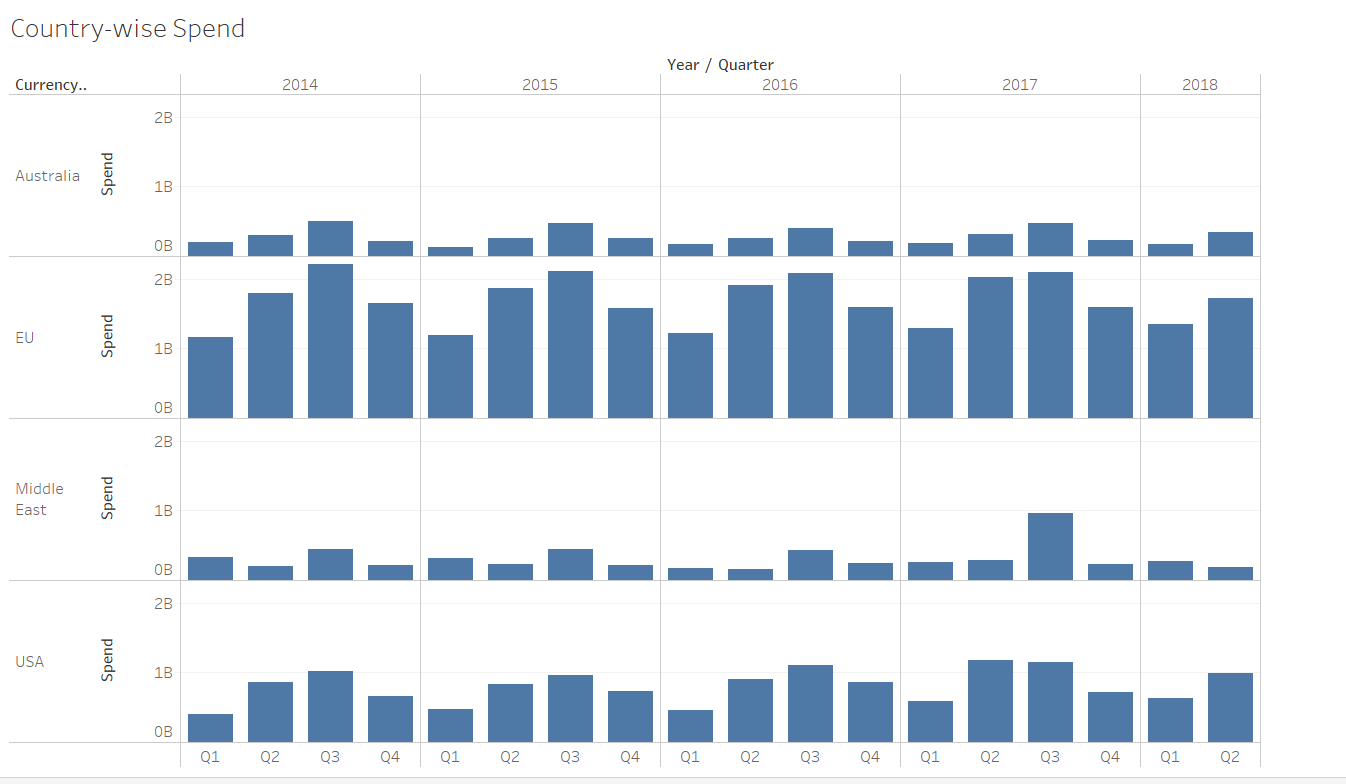

In [129]:
Image(filename = 'Ln121_Pic_Currency_All.png')

#### Observation 6.1:
As seen in the above graph, the Middle East spend has a distinct spike in 2017 Q3. The currency exchange rate data was used to investigate this. The below graph displays the AED/GBP currency exchange rates between 2014 to 2018 across all four quarters.

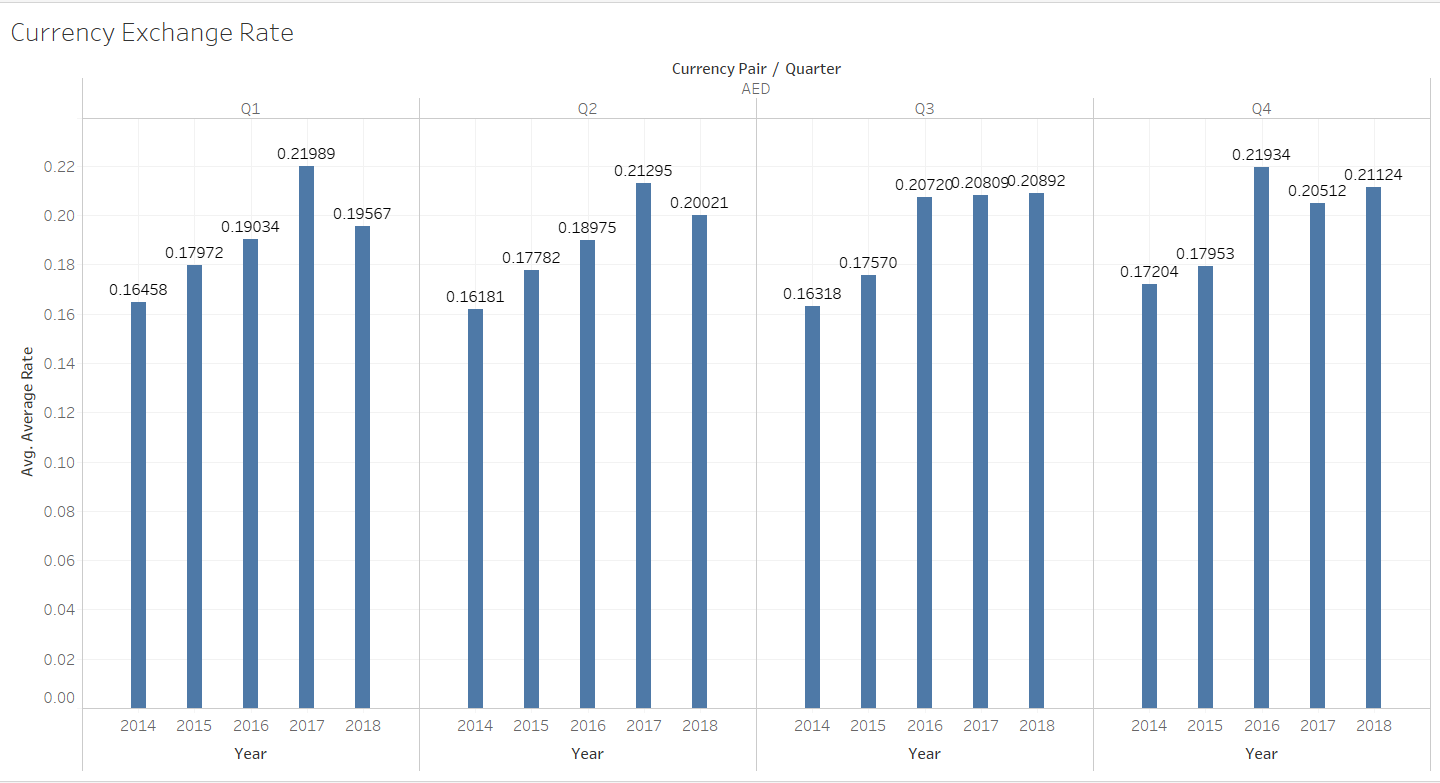

In [130]:
Image(filename = 'Ln121_Pic6_CurrencyAED.png')

It can be seen from the above graph that both 2016 Q4 and 2017 Q1 have a high exchange rate in favour of AED. It is possible that this consistent high rate could have encouraged travellers from this region to travel to the UK in 2017 Q3 which coincides with the religious holiday period. However, it is noticed that in 2017 Q3, the value of GBP appreciated and hence this could have lead to more spend in the UK.

#### Observation 6.2:
Although the overall spend trend shows a spike in Q3, it can be noticed in the Country-wise Spend graph that USA has an increase in spend in 2017 Q2. It was investigated against the USD/GBP currency exchange rate data.

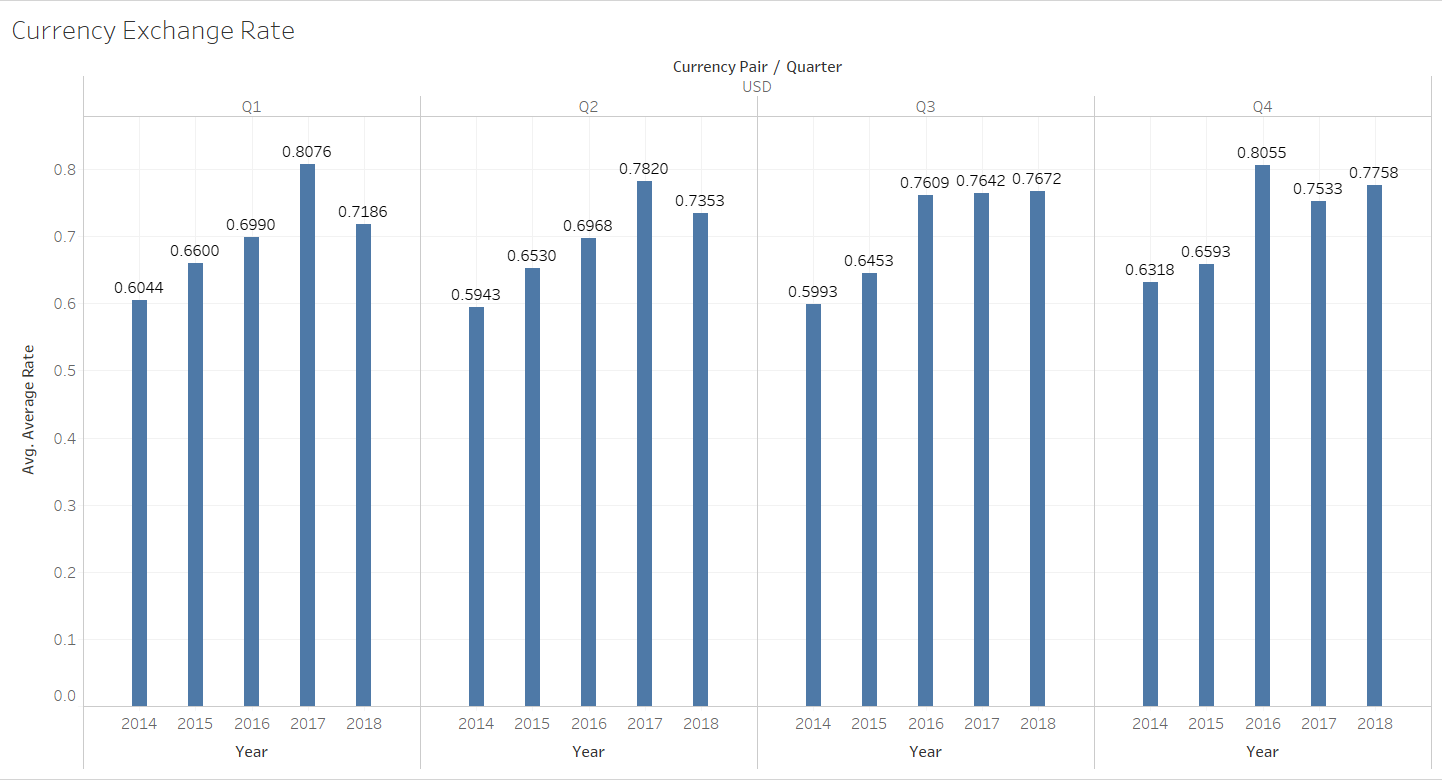

In [131]:
Image(filename = 'Ln121_Pic7_CurrencyUSD.png')

Similar to the AED comparison, it can be seen from the above graph that both 2016 Q4 and 2017 Q1 have a high exchange rate in favour of USD. It is possible that this consistent high rate could have encouraged travellers from this region to travel to the UK in 2017 Q3 which coincides with the summer holiday period. However, it is noticed that in 2017 Q3, the value of GBP appreciated and hence this could have lead to more spend in the UK.

#### Observation 6.3:
There is an interesting match between the spike in 2017 Q3 spend by EU and the EU/GBP currency exchange rate in that period.

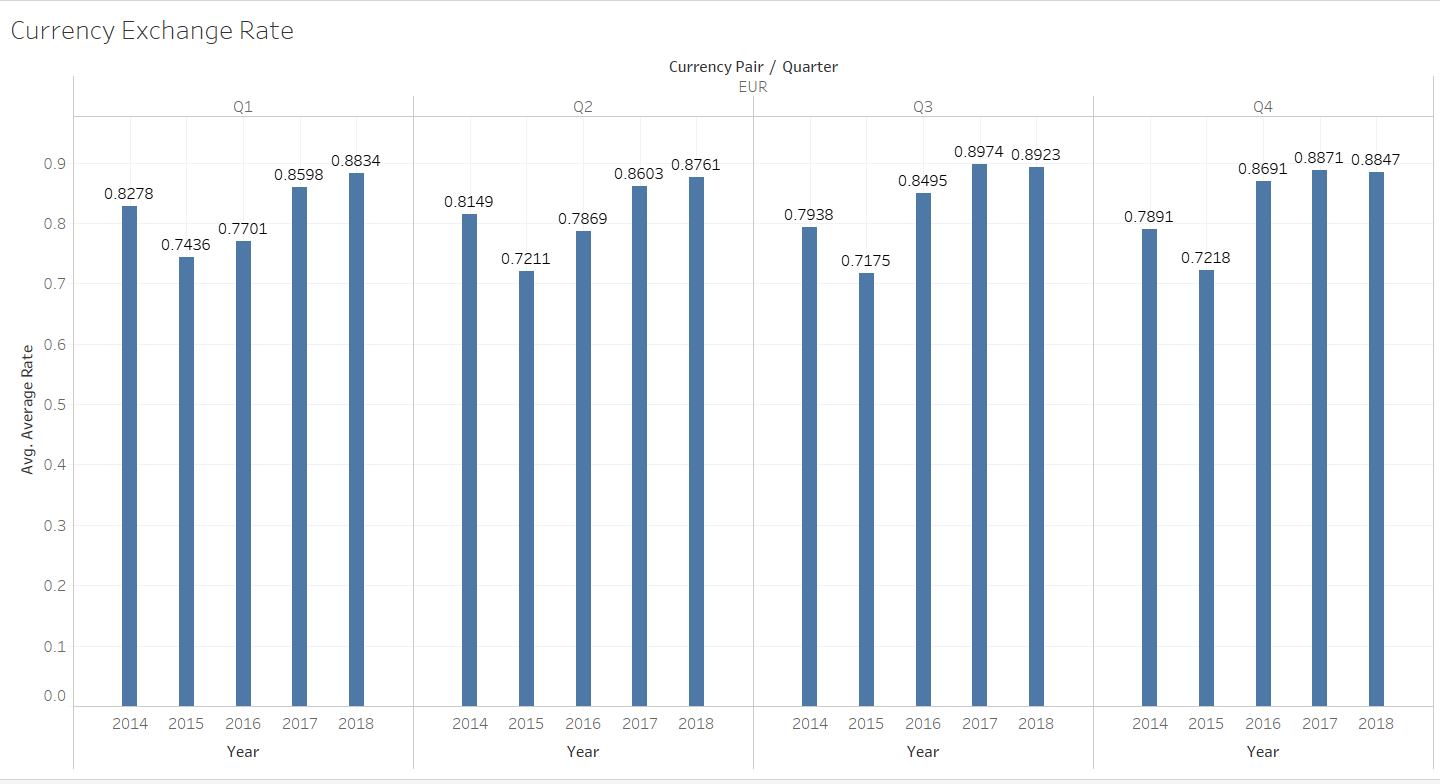

In [132]:
Image(filename = 'Ln121_Pic8_CurrencyEUR.png')

As can be seen in the above graph, in 2017Q3 the exchange rate was in favour of Euro. Given the high affordability of this currency at the time, school holiday period and short duration of travel from Europe to UK, there is a possibility that more number of travellers from Europe (with Euro currency) could have traveled to the UK thus reflecting the increase in 2017 Q3 spend.

The findings, reflections and future work recommendations of this report have been discussed in the PDF report submitted.